In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/MyDrive/Data/Temp_Provincias.csv', sep=';', decimal='.')

In [4]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,01/01/2018,Madrid,11.6,3.6
1,02/01/2018,Madrid,13.4,7.5
2,03/01/2018,Madrid,13.5,7.6
3,04/01/2018,Madrid,13.7,7.8
4,05/01/2018,Madrid,11.5,5.8


In [5]:
df.FECHA=pd.to_datetime(df.FECHA, format="%d/%m/%Y")

In [6]:
df.set_index('FECHA').resample('W')

In [7]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,2018-01-01,Madrid,11.6,3.6
1,2018-01-02,Madrid,13.4,7.5
2,2018-01-03,Madrid,13.5,7.6
3,2018-01-04,Madrid,13.7,7.8
4,2018-01-05,Madrid,11.5,5.8


In [8]:
df.columns

Index(['FECHA', 'Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [9]:
df = df.set_index('FECHA')
df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Madrid,11.6,3.6
2018-01-02,Madrid,13.4,7.5
2018-01-03,Madrid,13.5,7.6
2018-01-04,Madrid,13.7,7.8
2018-01-05,Madrid,11.5,5.8


In [10]:
valencia_df = df[df["Provincia"] == "Valencia"]
#df[valencia_df]

In [11]:
valencia_df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Valencia,18.0,10.5
2018-01-02,Valencia,20.5,12.5
2018-01-03,Valencia,22.9,13.5
2018-01-04,Valencia,22.0,14.9
2018-01-05,Valencia,20.0,14.3


In [12]:
valencia_df.columns

Index(['Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [13]:
valencia_df['Temp_Media'] = valencia_df[['T. Máxima','T.Mínima']].mean(axis=1)
valencia_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Valencia,18.0,10.5,14.25
2018-01-02,Valencia,20.5,12.5,16.50
2018-01-03,Valencia,22.9,13.5,18.20
2018-01-04,Valencia,22.0,14.9,18.45
2018-01-05,Valencia,20.0,14.3,17.15


In [14]:
valencia_df.head()

,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Valencia,18.0,10.5,14.25
2018-01-02,Valencia,20.5,12.5,16.50
2018-01-03,Valencia,22.9,13.5,18.20
2018-01-04,Valencia,22.0,14.9,18.45
2018-01-05,Valencia,20.0,14.3,17.15


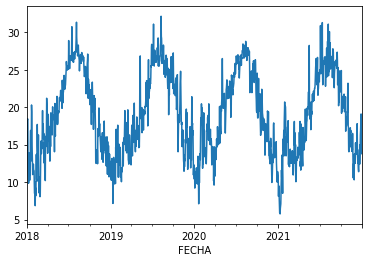

In [15]:
valencia_df['Temp_Media'].plot()

In [16]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':valencia_df.index,'y':valencia_df.Temp_Media})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
FECHA,,
2018-01-01,2018-01-01,14.25
2018-01-02,2018-01-02,16.50
2018-01-03,2018-01-03,18.20
2018-01-04,2018-01-04,18.45
2018-01-05,2018-01-05,17.15


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


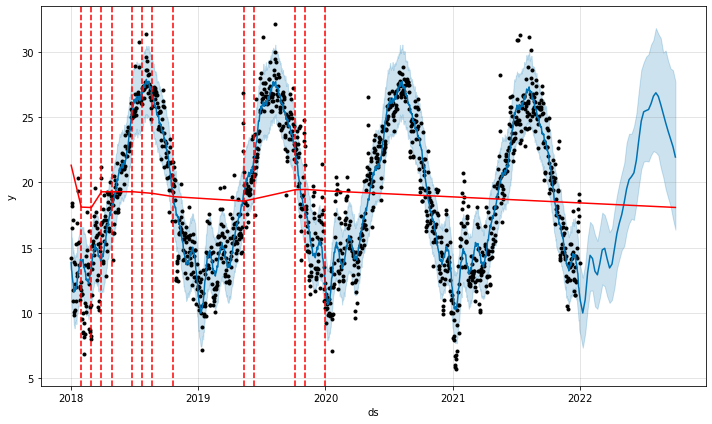

In [17]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=40, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [18]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,13.870807,11.189763,16.403837
1,2018-01-02,13.327635,10.722889,15.803673
2,2018-01-03,13.171383,10.504300,15.766961
3,2018-01-04,12.816923,10.281852,15.505483
4,2018-01-05,12.600681,10.212465,15.281625


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1496,2022-09-04,18.117818,19.504398,30.091607,13.757848,22.662309,6.453934,6.453934,6.453934,0.195185,0.195185,0.195185,6.258749,6.258749,6.258749,0.0,0.0,0.0,24.571753
1497,2022-09-11,18.108966,18.821142,29.311558,13.526246,22.822753,5.820079,5.820079,5.820079,0.195185,0.195185,0.195185,5.624894,5.624894,5.624894,0.0,0.0,0.0,23.929045
1498,2022-09-18,18.100113,18.206081,28.729878,13.287542,22.991543,5.233824,5.233824,5.233824,0.195185,0.195185,0.195185,5.038639,5.038639,5.038639,0.0,0.0,0.0,23.333937
1499,2022-09-25,18.091260,17.230270,28.577703,13.089585,23.168419,4.648597,4.648597,4.648597,0.195185,0.195185,0.195185,4.453412,4.453412,4.453412,0.0,0.0,0.0,22.739857
1500,2022-10-02,18.082408,16.381550,27.726519,12.904158,23.399905,3.860010,3.860010,3.860010,0.195185,0.195185,0.195185,3.664825,3.664825,3.664825,0.0,0.0,0.0,21.942418


In [20]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('temp_valencia.csv',  index=False, sep=";", decimal=",")